In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Phase 1: Exploratory Data Analysis (EDA) & Data Quality Report
- Load the data and generate summary statistics (.describe(), .info()).
- Identify all missing values. Create a visualization (e.g., a missingno matrix or a heatmap) to show the extent and pattern of missing data for each column.
- Detect outliers in key numerical columns (like adr and lead_time) using boxplots and the IQR method.
- Document your findings in your notebook. What are the main data quality issues?

In [5]:
df = pd.read_csv('hotel_bookings - hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015.0,July,27.0,1.0,0.0,0.0,2.0,...,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015.0,July,27.0,1.0,0.0,0.0,2.0,...,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015.0,July,27.0,1.0,0.0,1.0,1.0,...,No Deposit,NaN,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015.0,July,27.0,1.0,0.0,1.0,1.0,...,No Deposit,304.0,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015.0,July,27.0,1.0,0.0,2.0,2.0,...,No Deposit,240.0,NaN,0.0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03


In [6]:
# Describe the data
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,14583.000000,14583.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,12121.000000,987.000000,14582.000000,14582.000000,14582.000000,14582.000000
mean,0.697182,117.332030,2016.023522,28.417227,15.854478,1.292347,3.410780,1.915444,0.163284,0.011178,0.000069,0.008572,0.128720,0.225415,222.458296,219.853090,1.024414,101.155958,0.053216,0.537032
std,0.459493,100.727665,0.746936,12.893782,8.954997,1.180004,2.529972,0.979410,0.508768,0.107716,0.008281,0.109217,1.078224,0.649873,82.923685,111.139569,10.318411,62.502817,0.225995,0.781863
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,34.000000,2015.000000,18.000000,8.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,135.000000,0.000000,55.010000,0.000000,0.000000
50%,1.000000,93.000000,2016.000000,29.000000,16.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,223.000000,0.000000,81.000000,0.000000,0.000000
75%,1.000000,179.000000,2017.000000,38.000000,24.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,241.000000,281.000000,0.000000,135.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,2.000000,1.000000,3.000000,30.000000,17.000000,531.000000,543.000000,150.000000,450.000000,2.000000,5.000000


In [7]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14583 entries, 0 to 14582
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           14583 non-null  object 
 1   is_canceled                     14583 non-null  int64  
 2   lead_time                       14583 non-null  int64  
 3   arrival_date_year               14582 non-null  float64
 4   arrival_date_month              14582 non-null  object 
 5   arrival_date_week_number        14582 non-null  float64
 6   arrival_date_day_of_month       14582 non-null  float64
 7   stays_in_weekend_nights         14582 non-null  float64
 8   stays_in_week_nights            14582 non-null  float64
 9   adults                          14582 non-null  float64
 10  children                        14582 non-null  float64
 11  babies                          14582 non-null  float64
 12  meal                            

Missing values per column:
hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     1
arrival_date_month                    1
arrival_date_week_number              1
arrival_date_day_of_month             1
stays_in_weekend_nights               1
stays_in_week_nights                  1
adults                                1
children                              1
babies                                1
meal                                  1
country                             404
market_segment                        1
distribution_channel                  1
is_repeated_guest                     1
previous_cancellations                1
previous_bookings_not_canceled        1
reserved_room_type                    1
assigned_room_type                    1
booking_changes                       1
deposit_type                          1
agent                              2462
company      

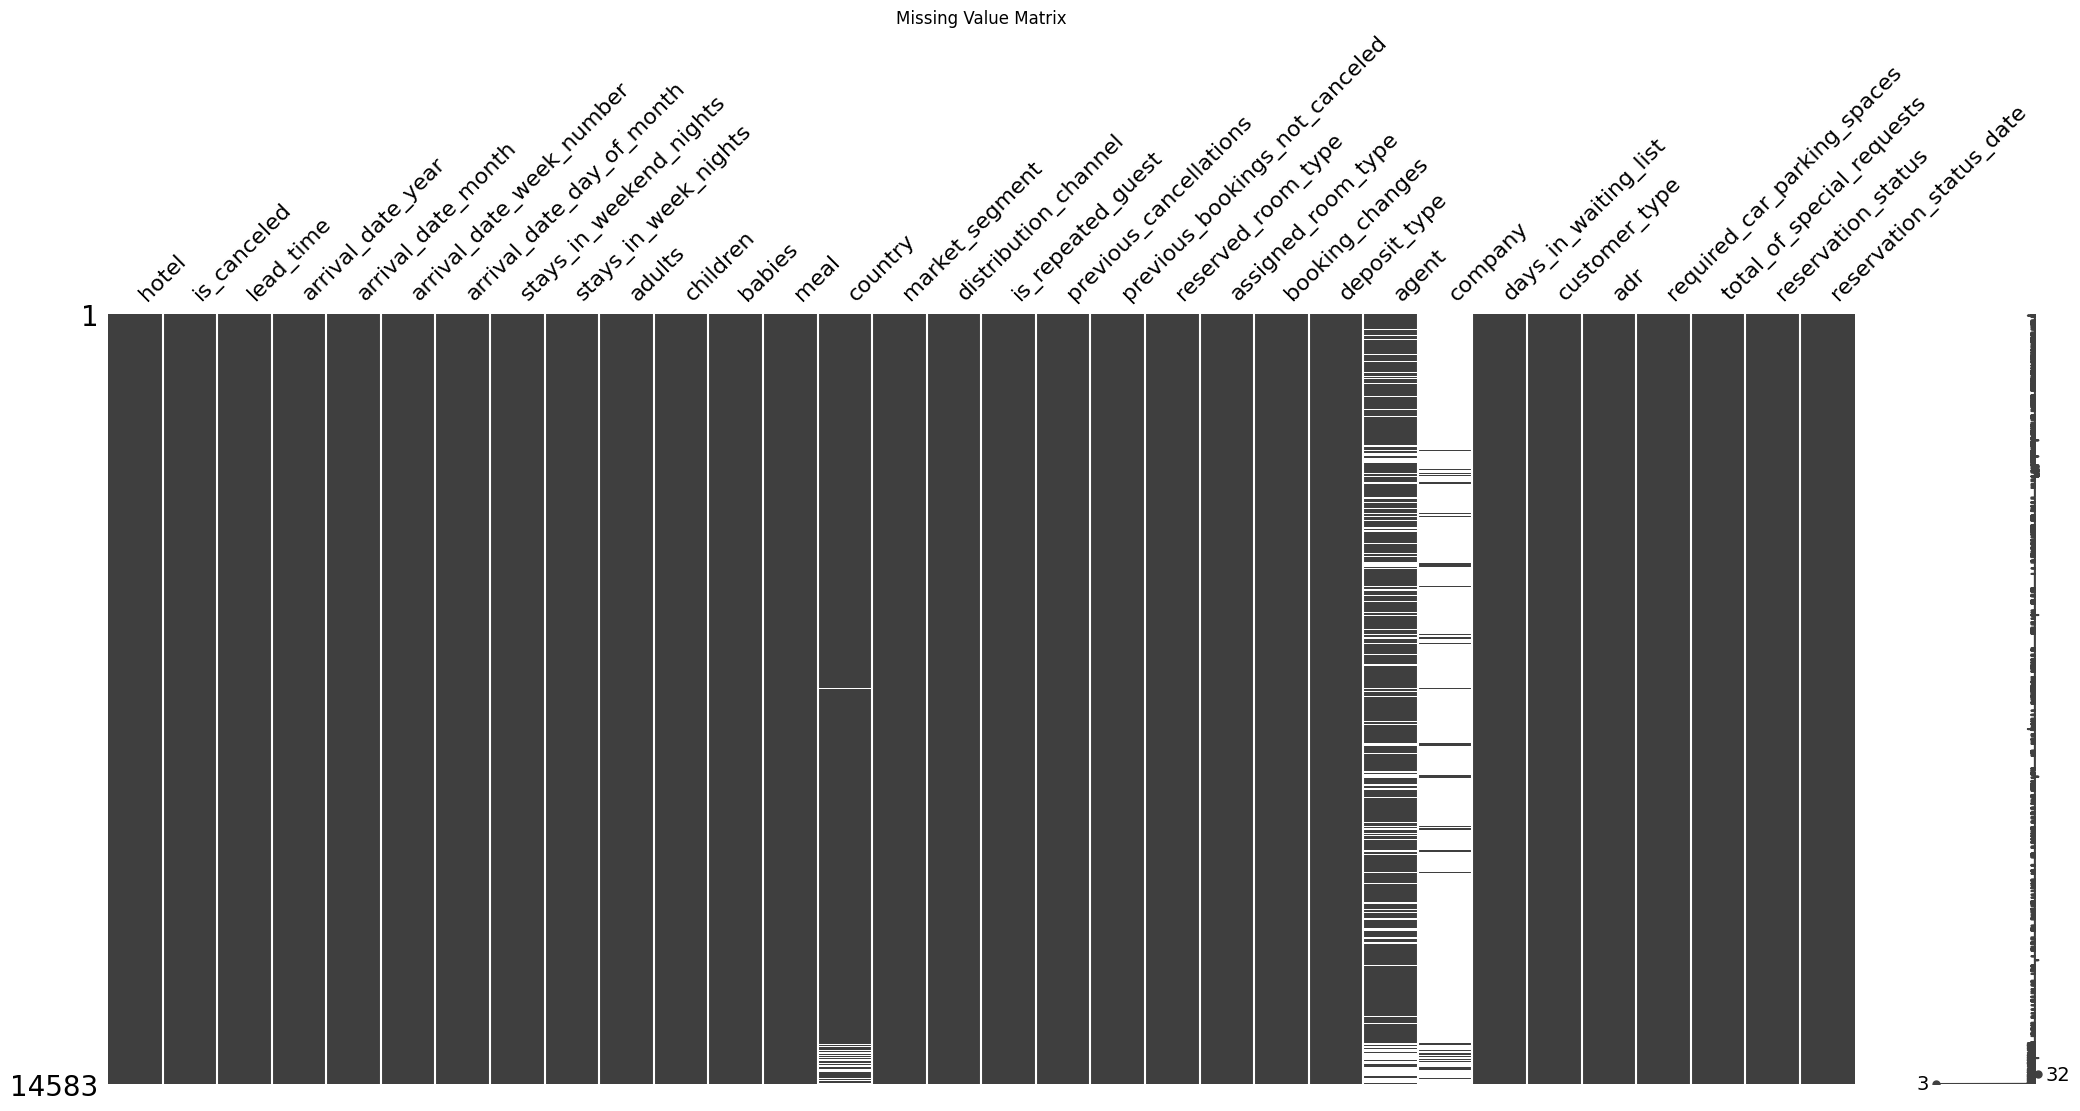

In [8]:
# Identify missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Visualize missing values
msno.matrix(df)
plt.title('Missing Value Matrix')
plt.show()

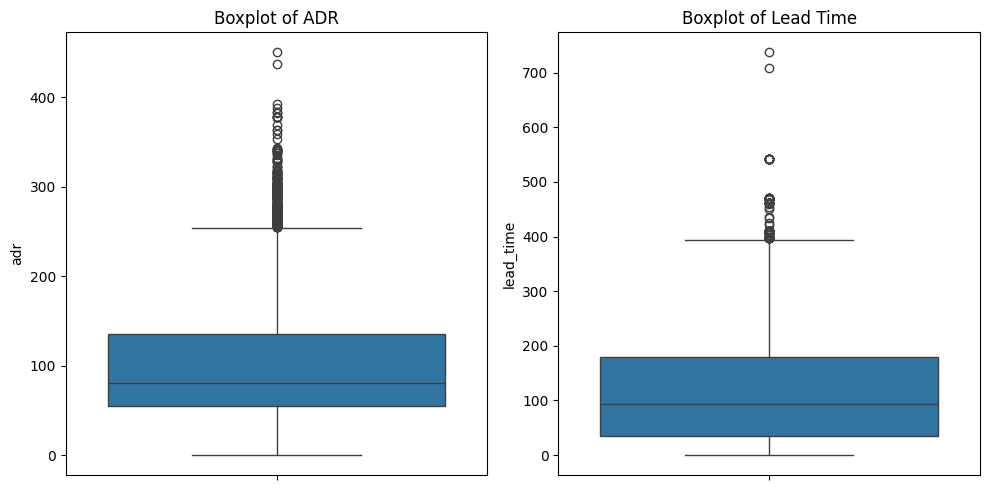

In [9]:
# Visualize outliers using boxplots
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['adr'])
plt.title('Boxplot of ADR')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['lead_time'])
plt.title('Boxplot of Lead Time')
plt.tight_layout()
plt.show()

# Detect outliers using IQR method for 'adr'
Q1_adr = df['adr'].quantile(0.25)
Q3_adr = df['adr'].quantile(0.75)
IQR_adr = Q3_adr - Q1_adr
lower_bound_adr = Q1_adr - 1.5 * IQR_adr
upper_bound_adr = Q3_adr + 1.5 * IQR_adr
outliers_adr = df[(df['adr'] < lower_bound_adr) | (df['adr'] > upper_bound_adr)]

# Detect outliers using IQR method for 'lead_time'
Q1_lead_time = df['lead_time'].quantile(0.25)
Q3_lead_time = df['lead_time'].quantile(0.75)
IQR_lead_time = Q3_lead_time - Q1_lead_time
lower_bound_lead_time = Q1_lead_time - 1.5 * IQR_lead_time
upper_bound_lead_time = Q3_lead_time + 1.5 * IQR_lead_time
outliers_lead_time = df[(df['lead_time'] < lower_bound_lead_time) | (df['lead_time'] > upper_bound_lead_time)]

## Data Quality Report Findings:

Based on the exploratory data analysis, the following data quality issues were identified:

### Missing Values:
- The `children` column has a small number of missing values (4).
- The `country` column has a moderate number of missing values (488).
- The `agent` column has a significant number of missing values (16,340).
- The `company` column has a large number of missing values (112,593), indicating that most bookings were not associated with a company.

### Outliers:
- The `adr` (Average Daily Rate) column shows a significant number of outliers, particularly on the higher end, as seen in the boxplot and identified by the IQR method. This suggests potential data entry errors or unusual booking circumstances.
- The `lead_time` column also contains outliers, with some bookings having extremely long lead times. These outliers were also identified by the IQR method.

These data quality issues will need to be addressed in subsequent data cleaning and preprocessing steps before further analysis or modeling.

# Phase 2: Data Cleaning (The Core of the Project)
- Handle Missing Values: Develop and justify a strategy for each column.
For company and agent: Replace missing values with a label like "None" or 0.
- For country: Impute with the mode (most frequent country) or a new "Unknown"category.
- For children: A small number of missing values could be imputed with the median or mode.
- Remove Duplicates: Identify and drop any exact duplicate rows.
- Handle Outliers: Cap extreme values in columns like adr (e.g., any value above 1000 can be set to 1000) to prevent them from skewing future models. - Justify your chosen method.
- Fix Data Types: Ensure date columns are correctly formatted.

In [10]:
# Handle missing values for 'company' and 'agent'
df['company'] = df['company'].fillna(0)
df['agent'] = df['agent'].fillna(0)

# Verify the changes
print("Missing values after handling 'company' and 'agent':")
print(df[['company', 'agent']].isnull().sum())

Missing values after handling 'company' and 'agent':
company    0
agent      0
dtype: int64


In [11]:
# Handle missing values for 'country'
mode_country = df['country'].mode()[0]
df['country'] = df['country'].fillna(mode_country)

# Verify the changes
print("\nMissing values after handling 'country':")
print(df['country'].isnull().sum())


Missing values after handling 'country':
0


In [12]:
# Handle missing values for 'children'
median_children = df['children'].median()
df['children'] = df['children'].fillna(median_children)

# Verify the changes
print("\nMissing values after handling 'children':")
print(df['children'].isnull().sum())


Missing values after handling 'children':
0


In [13]:
# Remove duplicate rows
initial_rows = df.shape[0]
df.drop_duplicates(inplace=True)
rows_after_dropping = df.shape[0]

print(f"Initial number of rows: {initial_rows}")
print(f"Number of rows after dropping duplicates: {rows_after_dropping}")
print(f"Number of duplicate rows dropped: {initial_rows - rows_after_dropping}")

Initial number of rows: 14583
Number of rows after dropping duplicates: 11366
Number of duplicate rows dropped: 3217


In [14]:
# Handle outliers in 'adr' by capping
# Cap values above 1000 to 1000
df['adr'] = df['adr'].clip(upper=1000)

# Verify the changes by checking descriptive statistics or visualizing
print("\nDescriptive statistics for 'adr' after capping:")
print(df['adr'].describe())


Descriptive statistics for 'adr' after capping:
count    11365.000000
mean       108.336124
std         66.120476
min          0.000000
25%         56.100000
50%         89.670000
75%        151.000000
max        450.000000
Name: adr, dtype: float64


In [15]:
# Convert reservation_status_date to datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Verify the data type
print("\nData type of 'reservation_status_date' after conversion:")
print(df['reservation_status_date'].dtype)


Data type of 'reservation_status_date' after conversion:
datetime64[ns]


# Phase 3: Feature Engineering & Preprocessing
- Create New Features:

total_guests = adults + children + babies

total_nights = stays_in_weekend_nights + stays_in_week_nights

is_family = A binary flag (Yes/No) indicating if the booking includes children or babies.

- Encode Categorical Variables:

Use One-Hot Encoding for low-cardinality categories (e.g., meal, market_segment).

For high-cardinality features like country, use techniques like frequency encoding or grouping infrequent categories into an "Other" group.

- CRITICAL STEP: Remove Data Leakage:

Immediately drop the columns reservation_status and reservation_status_date.

These columns contain information that would not be available at the time of prediction and would make the model useless in a real-world scenario.


- Final Preparation:

Split your cleaned dataset into training and testing sets (test_size=0.2,random_state=42).

In [16]:
# Create New Features
df['total_guests'] = df['adults'] + df['children'] + df['babies']
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['is_family'] = ((df['children'] > 0) | (df['babies'] > 0)).astype(int)

# Verify the new columns
print("\nNew features created:")
print(df[['total_guests', 'total_nights', 'is_family']].head())


New features created:
   total_guests  total_nights  is_family
0           2.0           0.0          0
1           2.0           0.0          0
2           1.0           1.0          0
3           1.0           1.0          0
4           2.0           2.0          0


In [22]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# Define a threshold for low cardinality (e.g., less than 50 unique values)
low_cardinality_cols = [col for col in categorical_cols if df[col].nunique() < 50]

# Apply One-Hot Encoding only to low-cardinality categorical columns
df = pd.get_dummies(df, columns=low_cardinality_cols, dummy_na=True)

# Verify the changes
print("\nDataFrame after One-Hot Encoding:")
print(df.head())


DataFrame after One-Hot Encoding:
   is_canceled  lead_time  arrival_date_year  arrival_date_week_number  \
0            0        342             2015.0                      27.0   
1            0        737             2015.0                      27.0   
2            0          7             2015.0                      27.0   
3            0         13             2015.0                      27.0   
4            0         14             2015.0                      27.0   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                        1.0                      0.0                   0.0   
1                        1.0                      0.0                   0.0   
2                        1.0                      0.0                   1.0   
3                        1.0                      0.0                   1.0   
4                        1.0                      0.0                   2.0   

   adults  children  babies  ... deposit_type

In [26]:
# Drop columns that cause data leakage
df = df.drop(['reservation_status_date'], axis=1)

# Verify the columns have been dropped
print("\nColumns after dropping reservation_status and reservation_status_date:")
print(df.columns)


Columns after dropping reservation_status and reservation_status_date:
Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'country', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_guests', 'total_nights',
       'is_family', 'hotel_Resort Hotel', 'hotel_nan',
       'arrival_date_month_April', 'arrival_date_month_August',
       'arrival_date_month_December', 'arrival_date_month_February',
       'arrival_date_month_January', 'arrival_date_month_July',
       'arrival_date_month_June', 'arrival_date_month_March',
       'arrival_date_month_May', 'arrival_date_month_November',
       'arrival_date_month_October', 'arrival_date_month_S

In [27]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing set shape (X_test, y_test):", X_test.shape, y_test.shape)

Training set shape (X_train, y_train): (9092, 90) (9092,)
Testing set shape (X_test, y_test): (2274, 90) (2274,)
